# Implementing Variational Auto Encoder (VAEs)

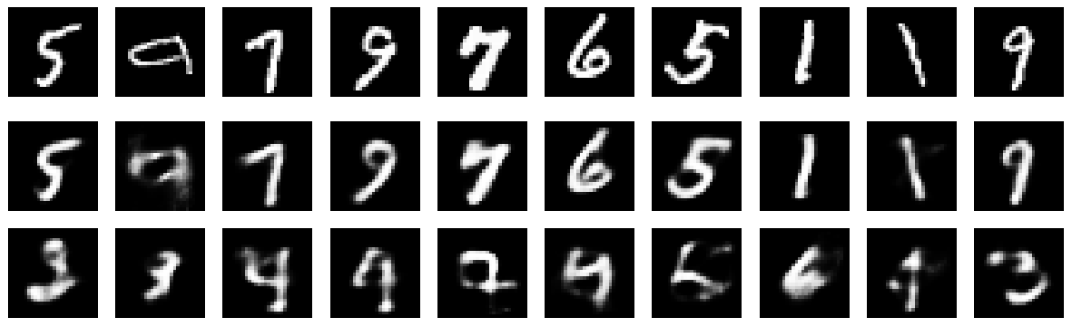


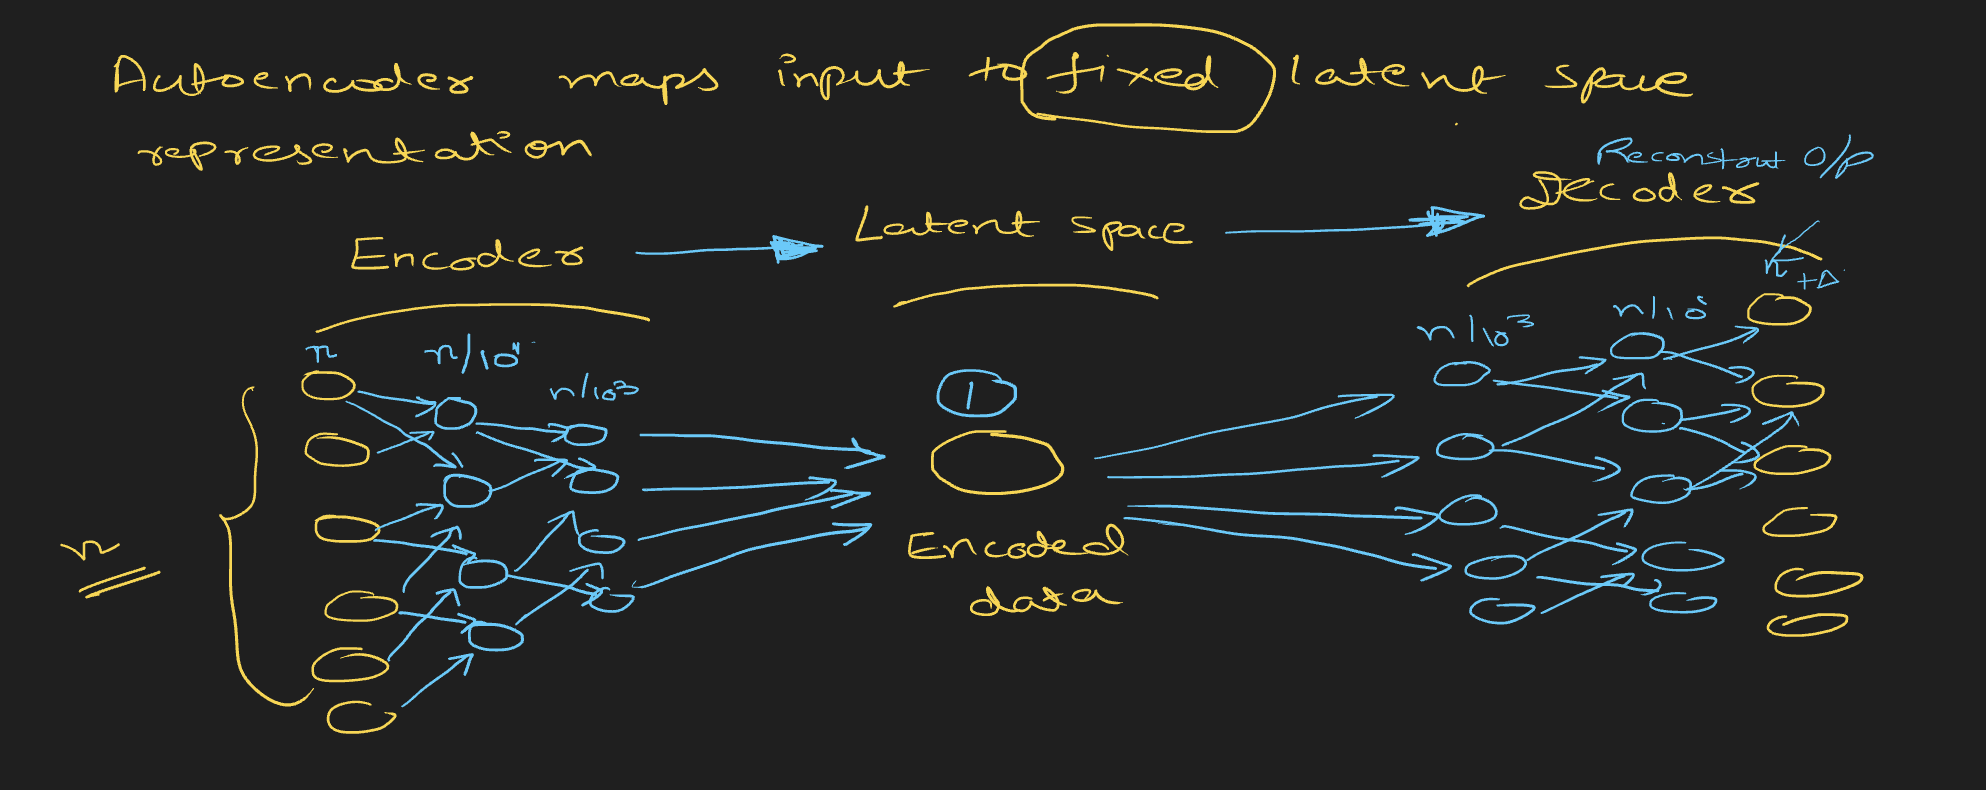

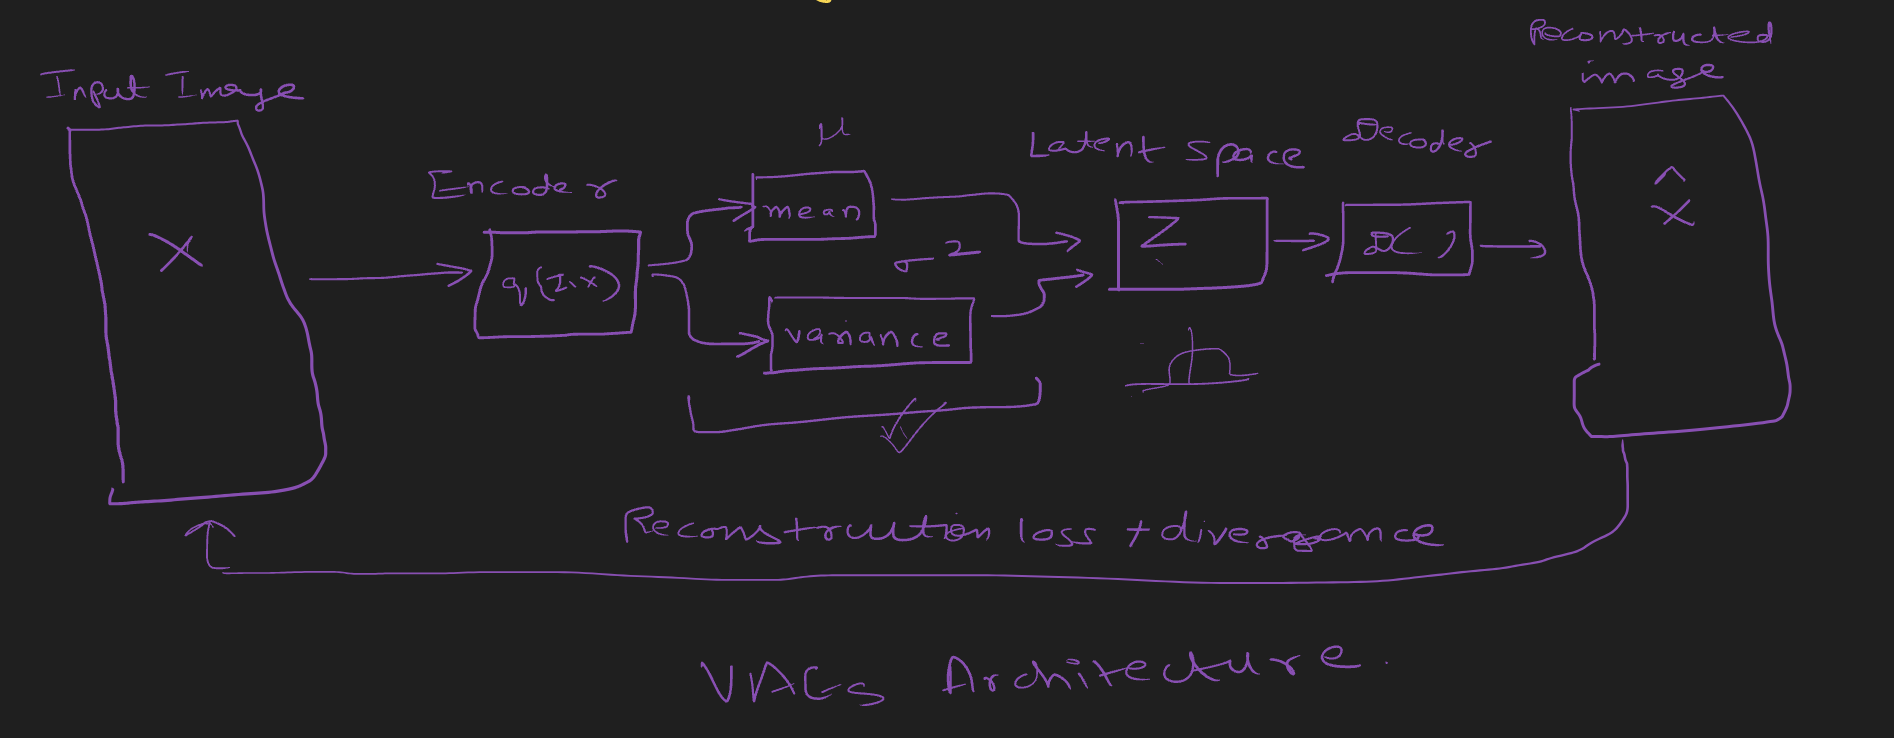

In [ ]:
!pip install torch torchvision matplotlib numpy

In [ ]:
#import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import dataloader
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Encoder class, which maps input data to the latent space

class Encoder(nn.Module):
  def __init__(self, input_dim, hidden_dim, latent_dim):
    """
    Initialize the Encoder class.

    Args:

    input_dim: dimension of the input data
    hidden_dim: dimension of the hidden layer
    latent_dim: dimension of the latent space
    """

    super(Encoder, self).__init__()

    #define fully connected layers
    self.fc1 = nn.Linear(input_dim, hidden_dim)
    self.fc_mu = nn.Linear(hidden_dim, latent_dim)
    self.fc_logvar = nn.Linear(hidden_dim, latent_dim)

  #define the forward pass through the Encoder
  def forward(self, x):
    """
    Define the forward pass through the Encoder.

    Args:

    x: input data

    Returns:
    mu: the mean of the latent space.
    logvar: the log variance of the latent space.
    """

    #apply ReLU activation to hidden layer

    h = torch.relu(self.fc1(x))

    #calculate Mu and Logvar
    mu = self.fc_mu(h)

    logvar = self.fc_logvar(h)

    return mu, logvar


In [ ]:
#Define the decoder class, which maps latent space to output

class Decoder(nn.Module):
  def __init__(self, latent_dim, hidden_dim, output_dim):
    """
    Initialize the decoder class

    Args:
    latent_dim: dimension of the latent space
    hidden_dim: dimension of the hidden layer
    output_dim: dimension of the output data

    """
    super(Decoder, self).__init__()

    #define fully connected layers for decoder

    self.fc1 = nn.Linear(latent_dim, hidden_dim)
    self.fc2 = nn.Linear(hidden_dim, output_dim)


  #define the forward pass through for the decoder

  def forward(self, z):
    """
    Define the forward pass through the decoder

    Args:
    z: the latent space data.

    Retures:
    x_hat: the reconstructed output data.
    """

    #apply ReLU activation to the hidden layer

    h = torch.relu(self.fc1(z))

    #apply sigmoid activation to output layer
    x_hat = torch.sigmoid(self.fc2(h))

    return x_hat



In [ ]:
#Define the variational autoencoder VAE class

class VAE(nn.Module):

  def __init__(self, input_dim, hidden_dim, latent_dim):
    """
    Initialize the VAE Class

    Args:
    input_dim: dimension of the input data
    hidden_dim: dimension of the hidden layer
    latent_dim: dimension of the latent space
    """

    super(VAE, self).__init__()

    #Define Encoder and Decoder instances
    self.encoder = Encoder(input_dim, hidden_dim, latent_dim)
    self.decoder = Decoder(latent_dim, hidden_dim, input_dim)

  def forward(self, x):
    """
    Define the forward pass through the VAE.

    Args:
    x: input data

    Returns:
    x_hat: the reconstructed output data.
    mu: the mean of the latent space.
    logvar: the log variance of the latent space.
    """

    #Encode input to the latent space
    mu, logvar = self.encoder(x)

    #sample from latent space using reparameterizatoin trick

    std = torch.exp(0.5*logvar)
    eps = torch.randn_like(std)

    z = mu + eps*std


    #decode latent space to output
    x_hat = self.decoder(z)

    return x_hat, mu, logvar



In [ ]:
def loss_function(x, x_hat, mu, logvar):
  """
  Define the loss functoin for the VAE

  Args:
  x: input data
  x_hat: the reconstructed output data.
  mu: the mean of the latent space.
  logvar: the log variance of the latent space.

  Returns:
  loss: the VAE loss.
  """

  #Calculate Binary Cross-Entropy loss
  BCE = nn.functional.binary_cross_entropy(x_hat, x, reduction='sum')

  #Calculate KL = kullback-leibler divergence loss
  KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

  return BCE + KLD


In [ ]:
input_dim = 784
hidden_dim = 400
latent_dim = 20
lr = 1e-3
batch_size = 128
epochs = 10


#Data loader
transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = dataloader.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 100MB/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 45.8MB/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 84.6MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.81MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
#model, optimizer
vae = VAE(input_dim, hidden_dim, latent_dim)
optimizer = optim.Adam(vae.parameters(), lr=lr)

#Training loop
for epoch in range(epochs):
  train_loss = 0
  for x, _ in train_loader:
    x = x.view(-1, input_dim)
    optimizer.zero_grad()
    x_hat, mu, logvar = vae(x)
    loss = loss_function(x, x_hat, mu, logvar)
    loss.backward()
    optimizer.step()
    train_loss += loss.item()

  print(f"Epoch {epoch+1}, Loss:{train_loss/len(train_loader.dataset)}")



Epoch 1, Loss:164.94970040690103
Epoch 2, Loss:122.04261378580729
Epoch 3, Loss:114.7786096516927
Epoch 4, Loss:111.73175107421875
Epoch 5, Loss:109.94012045898438
Epoch 6, Loss:108.77386201171875
Epoch 7, Loss:107.95056031901042
Epoch 8, Loss:107.309646484375
Epoch 9, Loss:106.79956819661459
Epoch 10, Loss:106.30153564453126


# Testing and Evaluation of the model


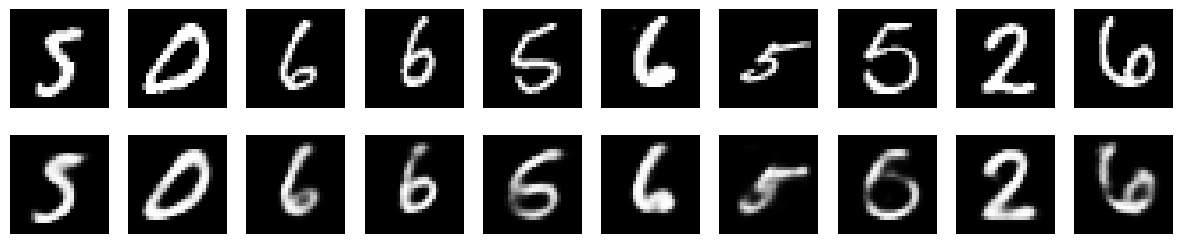

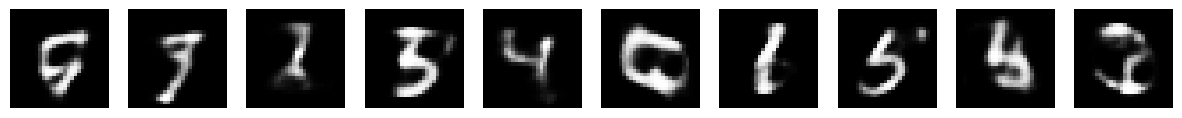

In [ ]:
vae.eval()

# Reconstructing of the input data
with torch.no_grad():

  x, _ = next(iter(train_loader)) #(-1, 784)

  x = x.view(-1, input_dim)

  x_hat, _, _ = vae(x)

  x = x.view(-1, 28, 28) #(28 * 28)

  x_hat = x_hat.view(-1, 28, 28)

  fig, axs = plt.subplots(2, 10, figsize= (15, 3))

  for i in range(10):
    axs[0, i].imshow(x[i].cpu().numpy(), cmap='gray')
    axs[1, i].imshow(x_hat[i].cpu().numpy(), cmap='gray')
    axs[0, i].axis('off')
    axs[1, i].axis('off')

  plt.show()






# Visualizing new Generated data

# Generative AI PART
with torch.no_grad():
  z = torch.randn(10, latent_dim)

  sample = vae.decoder(z)
  sample = sample.view(-1, 28, 28)

  fig, axs = plt.subplots(1, 10, figsize= (15, 3))

  for i in range(10):

    axs[i].imshow(sample[i].cpu().numpy(), cmap = 'gray')
    axs[i].axis('off')
  plt.show()


